# Evaluate RetinaNet (Backbone = ResNet101)

# Kvasir-SEG Dataset

In [1]:
import keras_retinanet as retinanet
from keras_retinanet import models
from keras_retinanet.models.retinanet import retinanet_bbox
import os
from keras_retinanet.preprocessing.csv_generator import CSVGenerator
from keras_retinanet.utils.eval import evaluate

#from keras_retinanet.utils.eval import compute_iou

In [2]:
anchor_params = None
num_anchors   = None
pyramid_levels = None

In [3]:
test_generator = CSVGenerator(
    csv_data_file=r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test.csv',
    csv_class_file=r'C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\class.csv',
    no_resize = True  
)

### With Data Augmentation

In [4]:
model_path_2 = os.path.join(r'C:\Users\Asus\Downloads\ResNet-101-model.keras.h5') #change the mode for resnet 50
model_2 = models.load_model(model_path_2, backbone_name='resnet101') #backbone name as renet50
prediction_model_2 = retinanet_bbox(model=model_2, anchor_params=anchor_params, pyramid_levels=pyramid_levels)

C:\Users\Asus\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer RandomNormal is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [8]:
AP_25_aug, inference_25_aug = evaluate(test_generator,
                                              prediction_model_2,
                                              iou_threshold=0.25,
                                              score_threshold=0.05,
                                              max_detections=100,
                                              save_path=None)

Running network: 100% (100 of 100) |#####| Elapsed Time: 0:03:47 Time:  0:03:47
Parsing annotations: 100% (100 of 100) |#| Elapsed Time: 0:00:00 Time:  0:00:00


In [9]:
AP_50_aug, inference_50_aug = evaluate(test_generator,
                                        prediction_model_2,
                                        iou_threshold=0.50,
                                        score_threshold=0.05,
                                        max_detections=100,
                                        save_path=None)

Running network: 100% (100 of 100) |#####| Elapsed Time: 0:03:12 Time:  0:03:12
Parsing annotations: 100% (100 of 100) |#| Elapsed Time: 0:00:00 Time:  0:00:00


In [10]:
AP_75_aug, inference_75_aug = evaluate(test_generator,
                                        prediction_model_2,
                                        iou_threshold=0.75,
                                        score_threshold=0.05,
                                        max_detections=100,
                                        save_path=None)

Running network: 100% (100 of 100) |#####| Elapsed Time: 0:03:19 Time:  0:03:19
Parsing annotations: 100% (100 of 100) |#| Elapsed Time: 0:00:00 Time:  0:00:00


In [11]:
print(AP_25_aug)

{0: (0.6700072121612661, 116.0)}


In [12]:
print(AP_50_aug)

{0: (0.5544962726865285, 116.0)}


In [13]:
print(AP_75_aug)

{0: (0.05617004396510001, 116.0)}


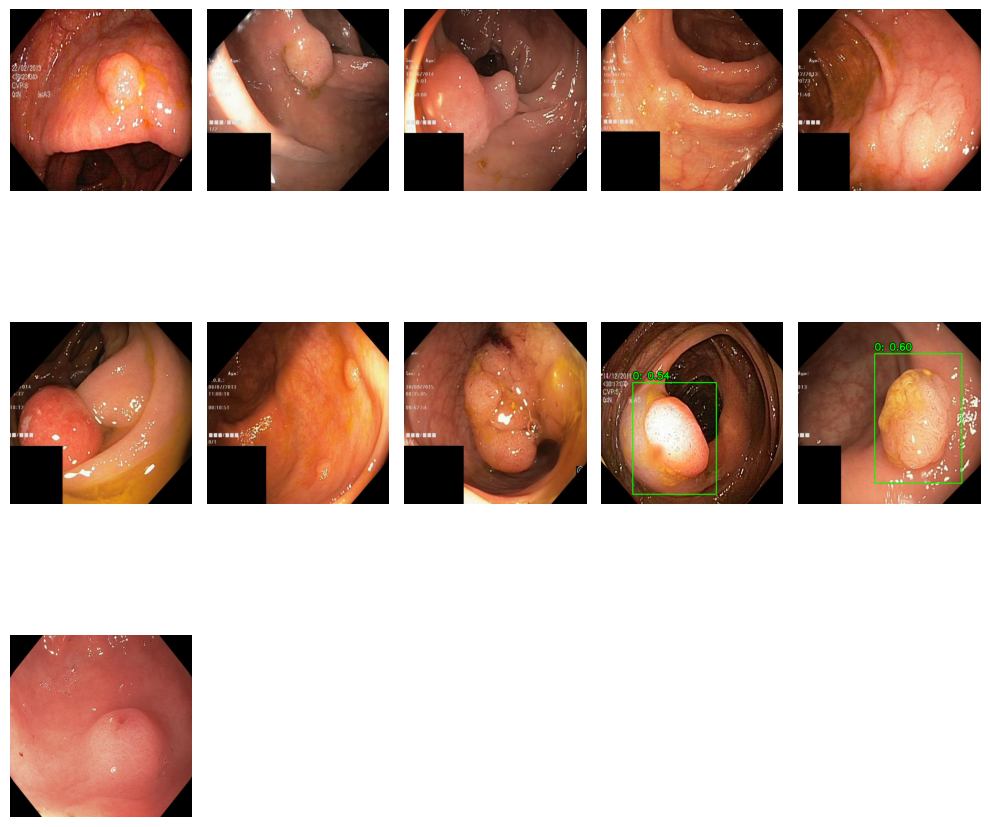

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define a list of 10 test image paths
test_image_paths = [
    r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test10.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test0.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test1.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test2.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test3.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test4.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test5.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test6.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test7.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test8.png",
r"C:\Users\Asus\Desktop\PG Project\Nandhini\Phase 2\Dataset\Kvasir-SEG\test\test9.png"
]

# Preprocess and visualize 10 images
num_images = len(test_image_paths)
num_rows = (num_images // 5) + (num_images % 5 > 0)  # Number of subplot rows
num_cols = min(num_images, 5)  # Number of subplot columns

plt.figure(figsize=(10, 10))  # Set the figure size to 10x10 inches

for i, image_path in enumerate(test_image_paths):
    # Load the test image
    test_image = cv2.imread(image_path)
    
    # Preprocess the test image
    preprocessed_image = test_generator.preprocess_image(test_image)
    preprocessed_image, scale = test_generator.resize_image(preprocessed_image)
    
    # Make predictions on the preprocessed image
    boxes, scores, labels = prediction_model_2.predict_on_batch(np.expand_dims(preprocessed_image, axis=0))
    
    # Define the score threshold for filtering predictions
    score_threshold = 0.5
    
    # Post-process the predictions
    boxes /= scale
    detections = []
    for box, score, label in zip(boxes[0], scores[0], labels[0]):
        if score >= score_threshold:
            detections.append({
                'box': box,
                'score': score,
                'label': label,
            })
    
    # Draw bounding boxes and labels on the image
    for detection in detections:
        box = detection['box']
        score = detection['score']
        label = detection['label']
        
        # Convert box coordinates to integers
        box = box.astype(np.int32)
        
        # Draw bounding box with stroke on the image
        cv2.rectangle(test_image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
        #cv2.rectangle(test_image, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 3)
        
        # Create a label with confidence score
        label_text = f'{label}: {score:.2f}'
        
        # Define the font properties
        font = cv2.FONT_HERSHEY_SIMPLEX
        font_scale = 0.9
        font_thickness = 2
        stroke_thickness = 3
        
        # Get the size of the text
        (label_width, label_height), baseline = cv2.getTextSize(label_text, font, font_scale, font_thickness)
        
        # Calculate the position for the label text
        label_position = (box[0], box[1] - 10)
        
        # Draw stroke around the label text
        cv2.putText(test_image, label_text, label_position, font, font_scale, (0, 0, 0), stroke_thickness + 2, cv2.LINE_AA)
        
        # Draw the label text
        cv2.putText(test_image, label_text, label_position, font, font_scale, (0, 255, 0), font_thickness, cv2.LINE_AA)
    
    # Display the image with bounding boxes and labels
    plt.subplot(num_rows, num_cols, i+1)
    plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the figure with all 10 images
plt.show()

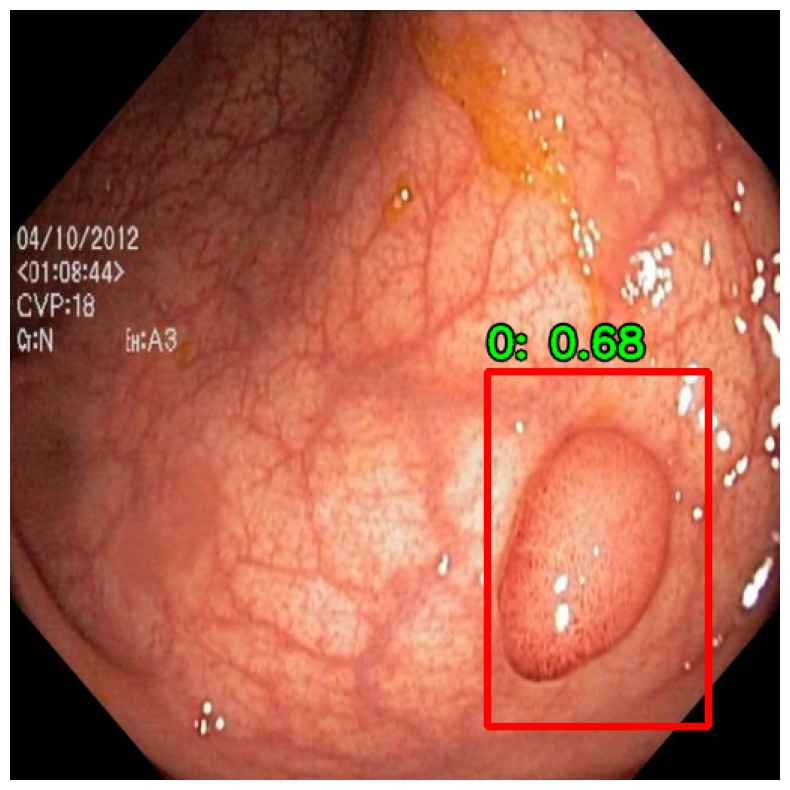

In [35]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the test image
test_image_path = r'C:\Users\Asus\Desktop\test\test66.png'
test_image = cv2.imread(test_image_path)

# Preprocess the test image
preprocessed_image = test_generator.preprocess_image(test_image)
preprocessed_image, scale = test_generator.resize_image(preprocessed_image)

# Make predictions on the preprocessed image
boxes, scores, labels = prediction_model_2.predict_on_batch(np.expand_dims(preprocessed_image, axis=0))

# Define the score threshold for filtering predictions
score_threshold = 0.5

# Post-process the predictions
boxes /= scale
detections = []
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    if score >= score_threshold:
        detections.append({
            'box': box,
            'score': score,
            'label': label,
        })

 # Visualize the predictions
plt.figure(figsize=(10, 10))  # Set the figure size to 10x10 inches      
# Visualize the predictions
for detection in detections:
    box = detection['box']
    score = detection['score']
    label = detection['label']
    
    # Convert box coordinates to integers
    box = box.astype(np.int32)
    
    # Draw bounding box with stroke on the image
    cv2.rectangle(test_image, (box[0], box[1]), (box[2], box[3]), (0, 255, 0), 2)
    cv2.rectangle(test_image, (box[0], box[1]), (box[2], box[3]), (0, 0, 255), 3)
    
    # Create a label with confidence score
    label_text = f'{label}: {score:.2f}'
    
    # Define the font properties
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.9
    font_thickness = 2
    stroke_thickness = 3
    
    # Get the size of the text
    (label_width, label_height), baseline = cv2.getTextSize(label_text, font, font_scale, font_thickness)
    
    # Calculate the position for the label text
    label_position = (box[0], box[1] - 10)
    
    # Draw stroke around the label text
    cv2.putText(test_image, label_text, label_position, font, font_scale, (0, 0, 0), stroke_thickness + 2, cv2.LINE_AA)
    
    # Draw the label text
    cv2.putText(test_image, label_text, label_position, font, font_scale, (0, 255, 0), font_thickness, cv2.LINE_AA)

# Display the image with bounding boxes and labels
plt.imshow(cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.savefig(r'C:\Users\Asus\Desktop\ccc.png')
plt.show()
